<a href="https://colab.research.google.com/github/ChaelinL/Deeplearning_for_everyone/blob/main/19%EC%9E%A5_%EC%8B%A4%EC%8A%B5(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오토인코더 실습하기

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# MNIST 데이터셋 불러오기
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28, 28, 1).astype('float32')/255

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
# 생성자 모델 만들기
autoencoder = Sequential()

In [5]:
# 인코딩 (차원 축소)
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [6]:
# 디코딩 (차원 복구)
autoencoder.add(Conv2D(8, kernel_size=3, padding='same',  activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same',  activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())  # MaxPooling이 2번인데 UpSampling이 3번인 이유는 커널이 적용되면서 크기가 알아서 줄기 때문
autoencoder.add(Conv2D(1, kernel_size=3, padding='same',  activation='sigmoid'))

In [8]:
# 컴파일 및 학습
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 16s 9ms/step - loss: 0.2176 - val_loss: 0.1388
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1294 - val_loss: 0.1201
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1167 - val_loss: 0.1117
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1104 - val_loss: 0.1073
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1066 - val_loss: 0.1040
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1039 - val_loss: 0.1016
Epoch 7/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1016 - val_loss: 0.0993
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0996 - val_loss: 0.0978
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0980 - val_loss: 0.0962
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0966 - val_loss: 0.09

In [9]:
# 학습 결과 출력
random_test = np.random.randint(X_test.shape[0], size=5)

313/313 [==============================] - 1s 3ms/step


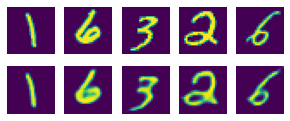

In [10]:
# 테스트할 이미지 랜덤 호출
ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7,2))  # 출력 이미지의 크기 설정

for i, image_idx in enumerate(random_test):
  # 랜덤으로 뽑은 이미지 차례로 나열
  ax = plt.subplot(2, 7, i+1)
  # 테스트할 이미지 먼저 그래도 보여주기
  plt.imshow(X_test[image_idx].reshape(28, 28))
  ax.axis('off')
  ax = plt.subplot(2, 7, 7+i+1)
  # 오토인코딩 결과를 다음 열에 입력
  plt.imshow(ae_imgs[image_idx].reshape(28, 28))
  ax.axis('off')
plt.show()